In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import json
from pprint import pprint
from datetime import datetime

In [2]:
with open('/users/youcefdjeddar/downloads/ultimate_challenge/logins.json') as f:
    data = json.load(f)

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
df.shape

(93142, 1)

In [7]:
df['login_time'] = pd.to_datetime(df['login_time'])

In [8]:
df['login_count'] = 1

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 2 columns):
login_time     93142 non-null datetime64[ns]
login_count    93142 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 MB


In [10]:
df.head()

,login_time,login_count
0,1970-01-01 20:13:18,1
1,1970-01-01 20:16:10,1
2,1970-01-01 20:16:37,1
3,1970-01-01 20:16:36,1
4,1970-01-01 20:26:21,1


In [11]:
df = df.set_index(pd.to_datetime(df['login_time'], unit='s'))[['login_count']]

In [12]:
logins15 = df.resample('15Min').sum()

In [13]:
logins15.head()

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


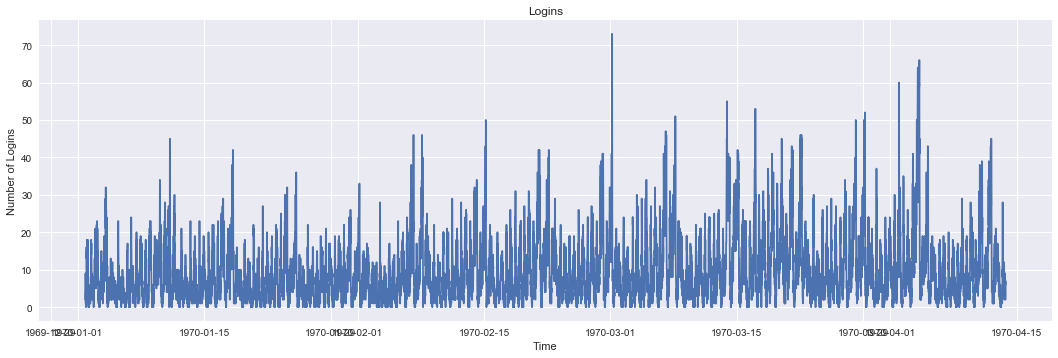

In [14]:
sns.set()
fig, ax = plt.subplots(figsize = (15,5))
plt.xlabel('Time')
plt.ylabel('Number of Logins')
plt.tight_layout()
plt.title('Logins')
plt.plot(logins15.index, logins15.login_count)

In [15]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [16]:
with open('/users/youcefdjeddar/downloads/ultimate_challenge/ultimate_data_challenge.json') as f:
    data1 = json.load(f)

In [17]:
df = pd.DataFrame(data1)

In [18]:
df.shape

(50000, 12)

In [19]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [20]:
df['active'] = np.where(df['trips_in_first_30_days']>0, 1, 0)

In [21]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,1


In [22]:
df.shape

(50000, 13)

In [23]:
df.active.value_counts()

1    34610
0    15390
Name: active, dtype: int64

In [24]:
34610/len(df)

0.6922

Percent of Active Users: 0.6922


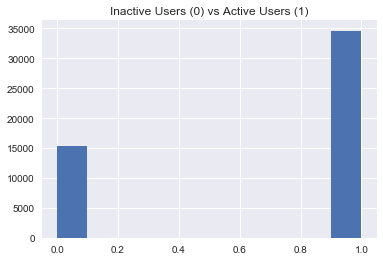

In [25]:
sns.set()
plt.hist(df.active)
plt.title('Inactive Users (0) vs Active Users (1)')
plt.show
print('Percent of Active Users: {}'.format(sum(df.active)/len(df.active)))

In [26]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
active                    50000 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(2), object(2)
memory usage: 4.6+ MB


In [28]:
df.isnull().sum()

avg_dist                     0
avg_rating_by_driver       201
avg_rating_of_driver      8122
avg_surge                    0
city                         0
last_trip_date               0
phone                      396
signup_date                  0
surge_pct                    0
trips_in_first_30_days       0
ultimate_black_user          0
weekday_pct                  0
active                       0
dtype: int64

In [29]:
df1 = df.dropna()

In [30]:
df1.median()

avg_dist                   3.78
avg_rating_by_driver       5.00
avg_rating_of_driver       4.90
avg_surge                  1.00
surge_pct                  0.00
trips_in_first_30_days     1.00
ultimate_black_user        0.00
weekday_pct               66.70
active                     1.00
dtype: float64

In [31]:
df['avg_rating_by_driver'] = df.avg_rating_by_driver.fillna(5.00)
df ['avg_rating_of_driver']= df.avg_rating_of_driver.fillna(4.90)

In [32]:
df.isnull().sum()

avg_dist                    0
avg_rating_by_driver        0
avg_rating_of_driver        0
avg_surge                   0
city                        0
last_trip_date              0
phone                     396
signup_date                 0
surge_pct                   0
trips_in_first_30_days      0
ultimate_black_user         0
weekday_pct                 0
active                      0
dtype: int64

In [33]:
df['phone'] = df['phone'].astype('category')
df['city'] = df['city'].astype('category')
df['ultimate_black_user'] = df['ultimate_black_user'].astype('category')

In [34]:
df['last_trip_date'] = df['last_trip_date'].astype('category')
df['signup_date'] = df['signup_date'].astype('category')

In [35]:
df.phone = df.phone.cat.codes
df.city = df.city.cat.codes
df.ultimate_black_user = df.ultimate_black_user.cat.codes

In [36]:
df['last_trip_date'] = df.last_trip_date.cat.codes
df['signup_date'] = df.signup_date.cat.codes

In [37]:
df.phone = df.phone.fillna(1.0)

In [38]:
df.isnull().sum()

avg_dist                  0
avg_rating_by_driver      0
avg_rating_of_driver      0
avg_surge                 0
city                      0
last_trip_date            0
phone                     0
signup_date               0
surge_pct                 0
trips_in_first_30_days    0
ultimate_black_user       0
weekday_pct               0
active                    0
dtype: int64

In [40]:
X = df.drop('active', axis = 1)
y = df.active

In [41]:
def split_df(a,n): return a[:n].copy(), a[n:].copy()

In [42]:
#Creating a dataset of 6000 of the most recent rows
n_test = 6000  
n_trainval = len(df)-n_test
raw_trainval, raw_test = split_df(df, n_trainval)
X_trainval, X_test = split_df(X, n_trainval)
y_trainval, y_test = split_df(y, n_trainval)

X_trainval.shape, y_trainval.shape, X_test.shape, y_test.shape

((44000, 12), (44000,), (6000, 12), (6000,))

In [43]:
#Creating a validation set of 4000 columns 
n_valid = 4000  
n_train = len(X_trainval) - n_valid
raw_train, raw_valid = split_df(X_trainval, n_train)
X_train, X_valid = split_df(X_trainval, n_train)
y_train, y_valid = split_df(y_trainval, n_train)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((40000, 12), (40000,), (4000, 12), (4000,))

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 31425 to 45357
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null int8
last_trip_date            50000 non-null int16
phone                     50000 non-null int8
signup_date               50000 non-null int8
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null int8
weekday_pct               50000 non-null float64
active                    50000 non-null int64
dtypes: float64(6), int16(1), int64(2), int8(4)
memory usage: 3.7 MB


In [45]:
knn = KNeighborsClassifier().fit(X_train, y_train)

In [46]:
knn.score(X_test, y_test)

0.8123333333333334

In [47]:
rfc = RandomForestClassifier().fit(X_train, y_train)

In [48]:
rfc.score(X_test, y_test)

1.0

In [49]:
rfc.score(X_train, y_train)

1.0

In [50]:
rfc.score(X_valid, y_valid)

1.0